### 0. Importing Libraries

In [1]:
import sys
import itertools

sys.path.append('../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from neural_net import NeuralNet

### 1. Reading the Data

In [4]:
def read_file(path, num, magic):
    """
    Read buffer & Convert to ndarray
    (ref: http://yann.lecun.com/exdb/mnist/)
    """
    with open(path, 'rb') as f:
        # Check metadata
        assert f.read(4) == magic.to_bytes(4, byteorder='big'), 'Invalid magic bytes'
        assert f.read(4) == num.to_bytes(4, byteorder='big'), 'Data size mismatch'
        if 'images' in path:
            f.read(8) # field for each datum's size
        data = f.read()
    return np.frombuffer(data, dtype=np.uint8)

In [5]:
train_files = {
    'images': 'data/train-images-idx3-ubyte', 
    'labels': 'data/train-labels-idx1-ubyte'
}
test_files = {
    'images': 'data/t10k-images-idx3-ubyte',
    'labels': 'data/t10k-labels-idx1-ubyte'
}

train_sz = 60000
test_sz = 10000
w, h = 28, 28

In [6]:
train_X = read_file(train_files['images'], num = train_sz, magic = 0x803)
train_y = read_file(train_files['labels'], num = train_sz, magic = 0x801)

test_X = read_file(test_files['images'], num = test_sz, magic = 0x803)
test_y = read_file(test_files['labels'], num = test_sz, magic = 0x801)

# Reshape array
train_X = train_X.reshape((train_sz, -1))
test_X = test_X.reshape((test_sz, -1))

# Check shapes
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [7]:
# Scale the dataset

train_X = train_X/255
test_X = test_X/255

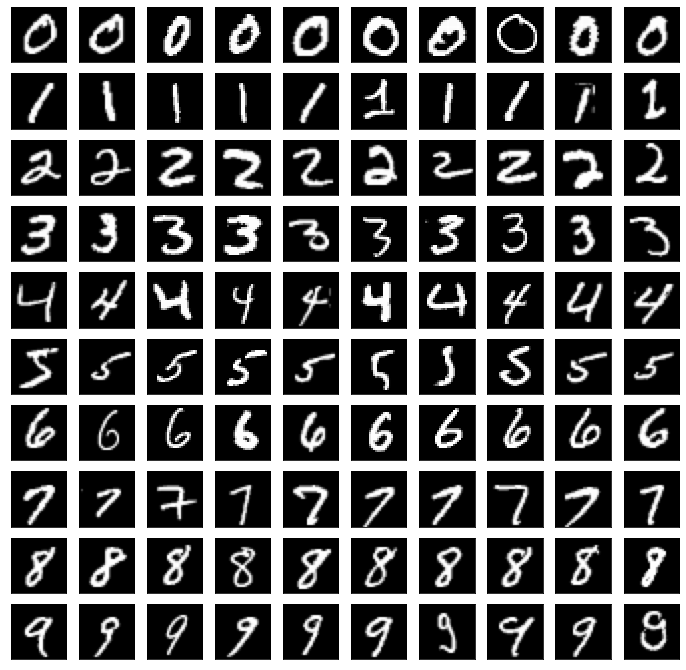

In [8]:
fig, axes = plt.subplots(10, 10, figsize=(12, 12), subplot_kw={'xticks': [], 'yticks': []})

for i, j in itertools.product(range(10), range(10)):
    axes[i][j].imshow(train_X[train_y==i][j].reshape((w, h)), cmap='gray')

### 2. Testing Module

In [9]:
# Test Initialization

nn = NeuralNet(input_dim=784, hidden_dim=128, output_dim=10)

for param, value in nn.params.items():
    print(param, value.shape)

W1 (784, 128)
b1 (128,)
W2 (128, 10)
b2 (10,)


In [10]:
preds = nn.predict(test_X)
print('Initial Accuracy : {:.2f}%'.format((preds==test_y).mean()*100))

Initial Accuracy : 11.97%


In [11]:
# No regularization term for now
loss = nn.loss(train_X, train_y)[0]

# Initial loss has to be close to log(C)
loss_diff = np.abs(loss-np.log(len(np.unique(train_y))))
print('Difference with expected loss : {:.8f}'.format(loss_diff))

Difference with expected loss : 0.00000007


In [12]:
history = nn.train(train_X, train_y, batch_sz=100, epochs=1000, reg=1e-3, lr=1, decay=True)

Runing epoch 1000/1000: 100%|█████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 311.92it/s]


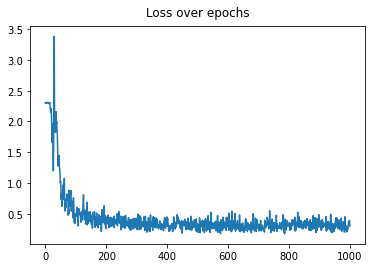

In [13]:
plt.plot(history)
plt.title('Loss over epochs', fontsize=12, pad=10)
plt.show()

In [14]:
preds = nn.predict(test_X)
print('Accuracy : {}'.format((preds == test_y).mean()))

Accuracy : 0.9382
